# **Introduction**

The entire company has a ton of data. Records analysis is occasionally needed for business development. By the dataset I learned crucial information about what works and how to develop the graph for the future . In this competitive environment, data analysis is essential for business development. To understand the application of records analytics, it is crucial to complete this analytics project. The Uber Data Analysis work enables us to comprehend the intricate fact visualization of this significant company. This project examined the Uber Trips in different cities. This assignment is centered mostly on data visualization and will direct you to look after the areas which will required to improve the services provided.


# **Importing all the Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import plotly.express as px
import plotly.offline as pyo


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('/kaggle/input/uber-data-analysis/UberDataset.csv')

# **Data Preparation**

In [3]:
df.shape

(1156, 7)

In [4]:
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.tail(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.CATEGORY.nunique()

2

In [8]:
#Checking data types
print("Data types of all columns in df:")
print(df.dtypes)

Data types of all columns in df:
START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object


In [9]:
# Convert the 'START_DATE' and 'END_DATE' columns to datetime with 'coerce'
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Now, check the data types of 'START_DATE' and 'END_DATE' columns
print("Data type of 'START_DATE':",df['START_DATE'].dtype)
print("Data type of 'END_DATE':",df['END_DATE'].dtype)


Data type of 'START_DATE': datetime64[ns]
Data type of 'END_DATE': datetime64[ns]


# **Data Cleaning**

In [10]:
drop_columns = df.columns.drop('PURPOSE')
df.dropna(subset=drop_columns, inplace=True)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [11]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [12]:
df['START'] = df['START'].replace("Kar?chi", "Karachi")
df['STOP'] = df['STOP'].replace("Kar?chi", "Karachi")

# **Exploratory Data Analysis**

In [13]:
df.CATEGORY.unique()

array(['Business', 'Personal'], dtype=object)

In [14]:
df.PURPOSE.unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [15]:
average_distance_travelled = df.groupby('PURPOSE')['MILES'].mean()
average_distance_travelled

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

**Comparison with the average distance travelled by passengers**

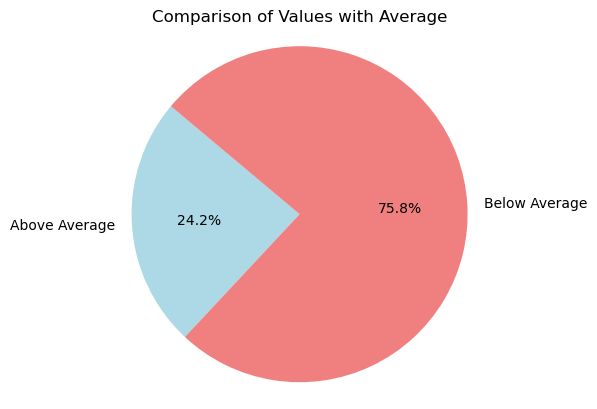

In [16]:
average_value = df['MILES'].mean()

# Compare values with the average and categorize them
above_average = df[df['MILES'] > average_value].shape[0]
below_average = df[df['MILES'] <= average_value].shape[0]

# Data for the pie chart
sizes = [above_average, below_average]
labels = ['Above Average', 'Below Average']
colors = ['lightblue', 'lightcoral']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 

plt.title('Comparison of Values with Average')
plt.show()

**Average miles travelled for different purposes**

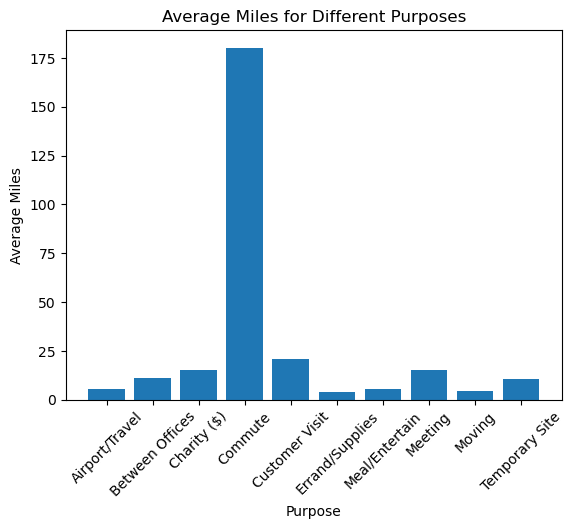

In [17]:
plt.bar(average_distance_travelled.index, average_distance_travelled.values)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Different Purposes')
plt.xticks(rotation=45)
plt.show()

**Type of Passengers Category Wise**

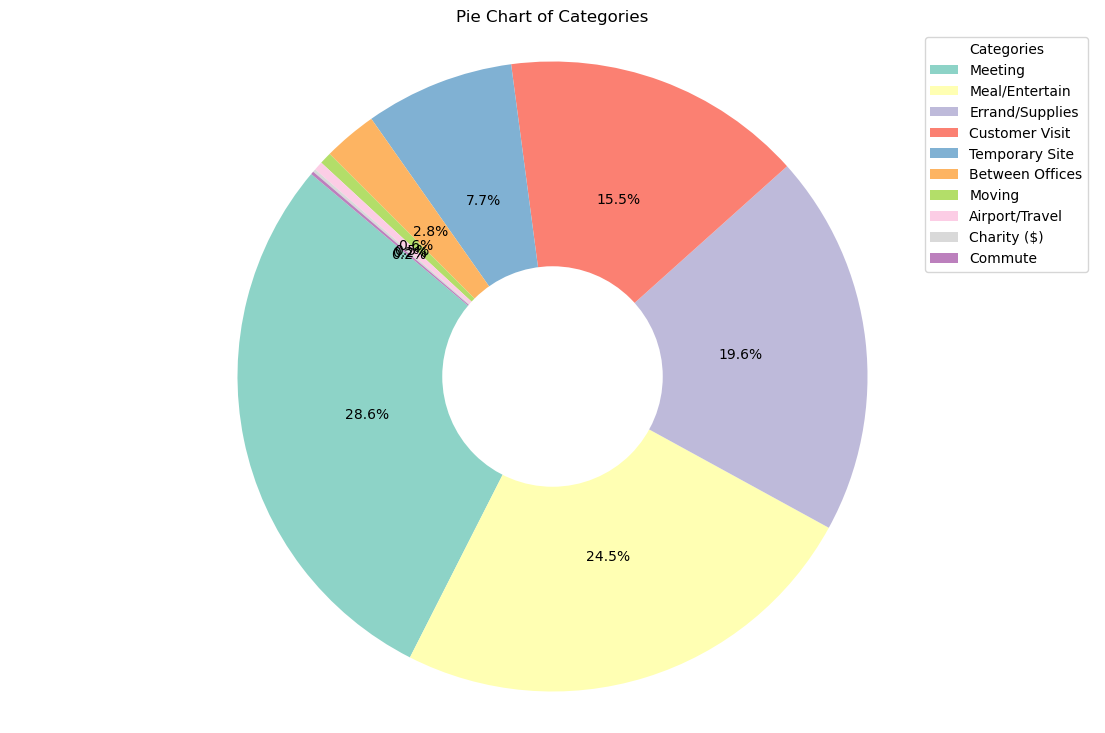

In [18]:
# Count the occurrences of each category
category_counts = df['PURPOSE'].value_counts()

# Data for the pie chart
sizes = category_counts.values
labels = category_counts.index
colors = plt.cm.Set3.colors  # Choose a colormap

# Create a pie chart
plt.figure(figsize=(14,9))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Adding white circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.35,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.legend(labels, title='Categories', loc='best')
plt.title('Pie Chart of Categories')
plt.show()

In [19]:
purpose=df['PURPOSE'].value_counts()
purpose

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

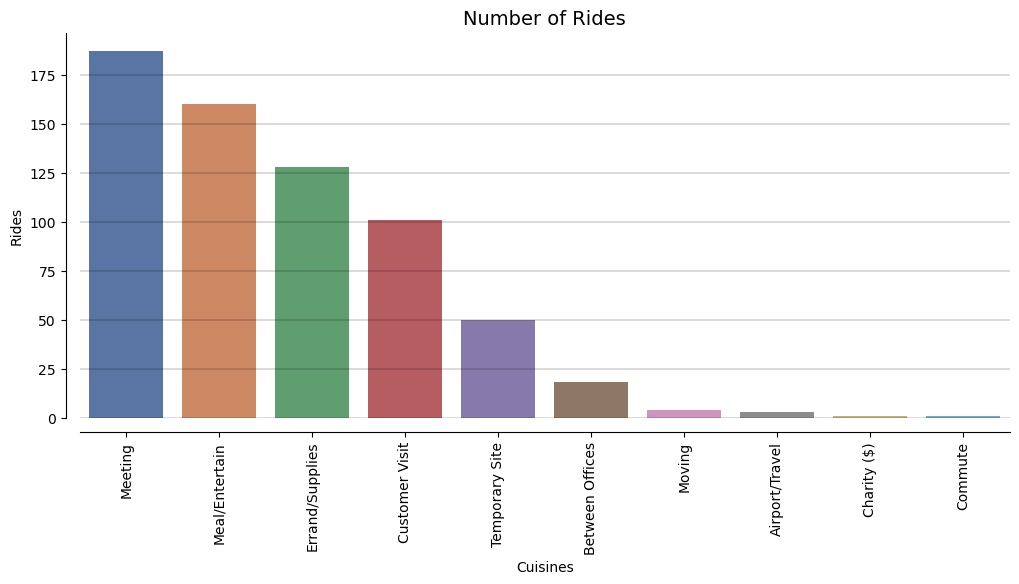

In [20]:
c = df.PURPOSE.value_counts().reset_index().rename({'index':'PURPOSE','PURPOSE':'frequency'}, axis =1)

plt.figure(figsize=(12,5))                                       

#color of graph
sns.barplot(data = c.head(20),
           x='PURPOSE',
           y = 'frequency',
           palette= "deep", 
          )     


#differentiating lines
plt.grid(True, axis = 'y',                                                 
         color = 'black', 
         linestyle = '-',  
         linewidth=0.2
        ) 

plt.grid(False, axis = 'x')                                   

#rotate the x-axis labels        
sns.despine(offset=10, trim=False)
plt.xticks(rotation = 90) 

#fontsize
plt.xlabel("Cuisines", fontsize = 10)                                          
plt.ylabel("Rides", fontsize = 10)                                  
plt.title('Number of Rides', fontsize = 14)                
plt.show()

In [21]:
average_miles_by_category = df.groupby('CATEGORY')['MILES'].mean()
average_miles_by_category

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64

In [22]:
# least 5 start stations
least_5_start_stations = df['START'].value_counts().nsmallest(5)
least_5_start_stations


Fuquay-Varina           1
Wake Co.                1
NOMA                    1
Santa Clara             1
North Berkeley Hills    1
Name: START, dtype: int64

In [23]:
# least 5 stop stations
least_5_stop_stations = df['STOP'].value_counts().nsmallest(5)
least_5_stop_stations

Arlington Park at Amberly    1
Stonewater                   1
Elk Park                     1
Summerwinds                  1
Parkwood                     1
Name: STOP, dtype: int64

**Performance of top start and stop stations**

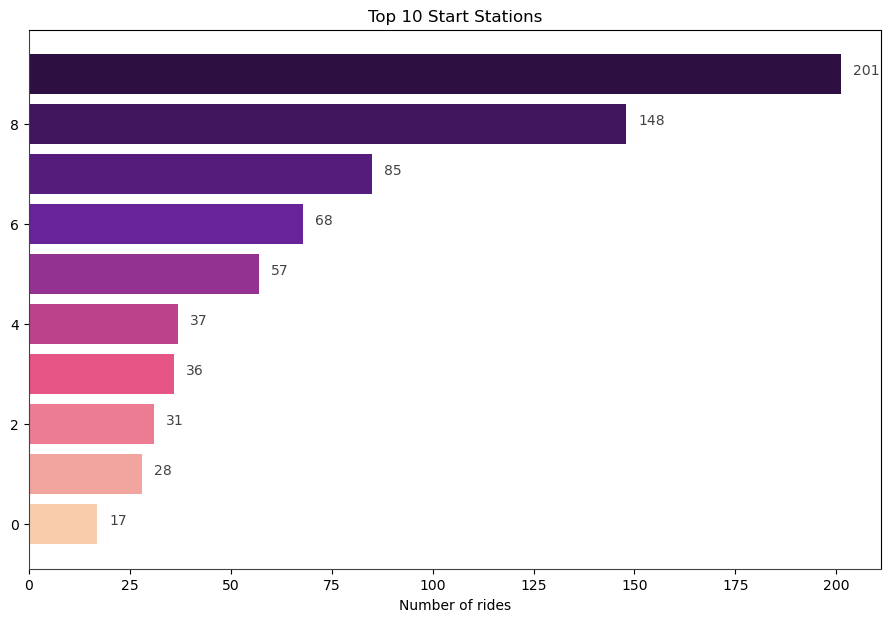

In [24]:
top10_startstations = df["START"].value_counts()[:10].sort_values(ascending=True)

height = top10_startstations.values
bars = top10_startstations.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible("#424242")
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xlabel("Number of rides")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Start Stations")


plt.show()

**Index:**

0:Westpark Place       
1:Raleigh          
2:Karachi       
3:Lahore         
4:Durham             
5:Islamabad
6:Whitebridge     
7:Morrisville     
8:Unknown Location
9:Cary     

In [25]:
top10_startstations

Westpark Place       17
Raleigh              28
Karachi              31
Lahore               36
Durham               37
Islamabad            57
Whitebridge          68
Morrisville          85
Unknown Location    148
Cary                201
Name: START, dtype: int64

In [26]:
top10_stopstations = df["START"].value_counts()[:10].sort_values(ascending=True)
top10_stopstations

Westpark Place       17
Raleigh              28
Karachi              31
Lahore               36
Durham               37
Islamabad            57
Whitebridge          68
Morrisville          85
Unknown Location    148
Cary                201
Name: START, dtype: int64

**Ride Durations**

In [27]:
# calculating ride durations by subtracting start time by end time
df['ride_duration'] = df['END_DATE'] - df['START_DATE']

# Calculating min, max, and average ride durations
min_duration = df['ride_duration'].min()
max_duration = df['ride_duration'].max()
average_duration = df['ride_duration'].mean()

print("Minimum ride duration:", min_duration)
print("Maximum ride duration:", max_duration)
print("Average ride duration:", average_duration)

Minimum ride duration: 0 days 00:00:00
Maximum ride duration: 0 days 05:36:00
Average ride duration: 0 days 00:23:14.597402597


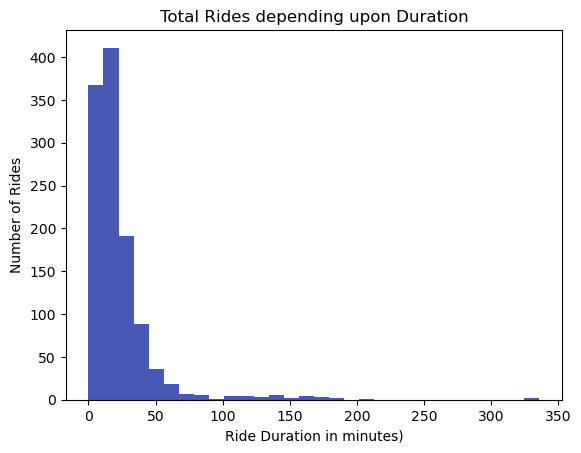

In [28]:
#plotting the values in histogram
plt.hist(df['ride_duration'].dt.total_seconds() / 60, bins=30 , color= '#4958B5') 
plt.xlabel('Ride Duration in minutes)')
plt.ylabel('Number of Rides')
plt.title('Total Rides depending upon Duration')
plt.show()